# Analyzing the UncertaintyForest Class by Reproducing Mutual Information Estimates

This set of four tutorials (`uncertaintyforest_running_example.ipynb`,`uncertaintyforest_posteriorestimates.ipynb`, `uncertaintyforest_conditionalentropyestimates.ipynb`, and `uncertaintyforest_mutualinformationestimates.ipynb`) will explain the UncertaintyForest class. After following these tutorials, you should have the ability to run UncertaintyForest on your own machine and generate Figures 1, 2, and 3 from [this paper](https://arxiv.org/pdf/1907.00325.pdf), which help you to visualize a comparison of the estimated posteriors and conditional entropy values for several different algorithms. 

If you haven't seen it already, take a look at other tutorials to setup and install the ProgLearn package: `installation_guide.ipynb`.

*Goal: Run the UncertaintyForest class to produce a figure that compares estimated normalized mutual information values for the UncertaintyForest, KSG, Mixed KSG, and IRF algorithms, as in Figure 3 from [this paper](https://arxiv.org/pdf/1907.00325.pdf)*

## Import Required Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

from proglearn.forest import UncertaintyForest
from functions.unc_forest_tutorials_functions import generate_data_fig3, _make_params, _make_three_class_params, plot_setting, compute_mutual_info, estimate_mi, get_plot_mutual_info_by_pi, get_plot_mutual_info_by_d, plot_fig3, ksg, mixed_ksg



In [2]:
# Setting figures.
settings = [
    {
        'name' : 'Spherical Gaussians',
        'kwargs': {},
    },
    {
        'name' : 'Elliptical Gaussians',
        'kwargs': {'var1' : 3},
    },
    {
        'name' : 'Three Class Gaussians',
        'kwargs': {'three_class' : True},
    },
]

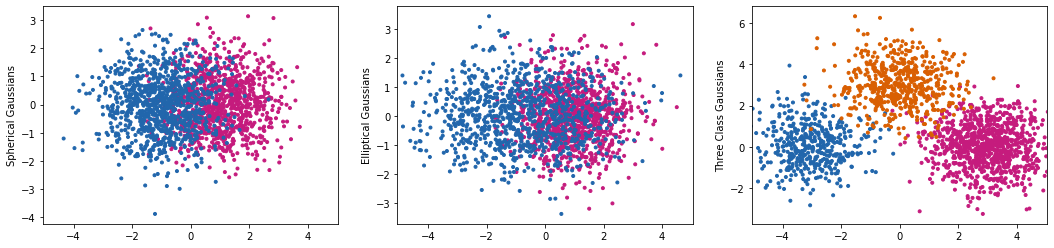

<Figure size 432x288 with 0 Axes>

In [3]:
# Plot data.
fig, axes = plt.subplots(1, len(settings), figsize = (18,4))
for i, setting in enumerate(settings):
    plot_setting(2000, setting, axes[i])
    
plt.show()
plt.clf()

## Specify Parameters

In [4]:
# The following are two sets of parameters.
# The first are those that were actually used to produce Figure 3.
# Below those, you'll find some scaled-down parameters so that you can see the results more quickly.

# Here are the paper reproduction parameters
# n = 6000
# mus = range(5)
# ds = range(1, 16)
# mu = 1
# num_trials = 20
# d = 2
# pis = [0.05 * i for i in range(1, 20)]

# Here are the scaled-down tutorial parameters
n = 400 # number of samples
mus = range(3) # range of means
ds = range(2, 5) # range of dimensions
mu = 1 # mean
num_trials = 3 # number of trials to run
d = 1 # dimension
pis = [0.05 * i for i in range(3, 6)] # prior distribution


## Specify Learners
Now, we'll specify which learners we'll compare (by label). Figure 3 uses four different learners, which are further specified in the function `estimate_mi`, which returns estimates of mutual information for a given dataset (X, y) and type of learner.

In [5]:
# Algorithms used to produce Figure 3
algos = [
    {
        'label': 'IRF',
        'title': 'Isotonic Reg. Forest',
        'color': "#fdae61",
    },
    {
        'label': 'KSG',
        'title': 'KSG',
        'color': "#1b9e77",
    },
    {
        'label': 'Mixed KSG',
        'title': 'Mixed KSG',
        'color': "purple",
    },
    {
        'label': 'UF',
        'title': 'Uncertainty Forest',
        'color': "#F41711",
    },
]

parallel = False

## Plot Figure 3

Finally, we'll run the code to obtain and plot the spherical, elliptical, and three class Gaussians, as well as estimated mutual information vs. class priors and dimensionality (9 subplots).

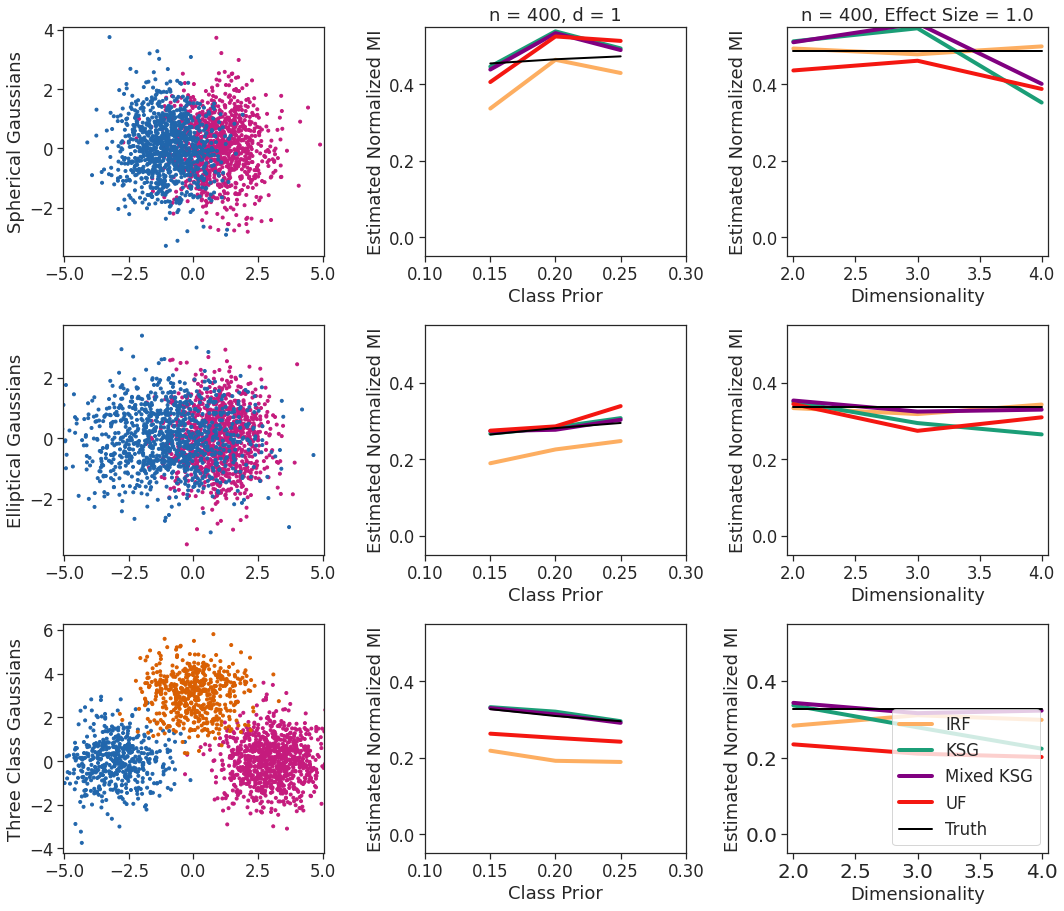

In [6]:
plot_fig3(algos, n, d, mu, settings, pis, ds, num_trials, parallel = parallel)